# Summary
The purpose of this notebook is to demonstrate how to create a **forest plot** in Python to visualize the logistic regression results as an alternative to the summary table. Basically, the forest plot can be used to graphically show the odds ratios and confidence intervals associated with them. Furthermore, this plot may also be used as an aid in analyzing and interpreting findings from logistic regression.

# Dataset

The dataset we’ll be using is the **Pima Indians Diabetes Dataset** from the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset is used to create models that predict the onset of diabetes based on certain diagnostic measurements from 768 observations. It’s a binary classification problem with eight input variables and one output variable.

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skinfold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)²)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1; class value 1 is interpreted as “tested positive for diabetes”)

Note that this dataset is imbalance. Among the 768 observations, only 268 (34.9%) instances were tested positive for diabetes. But, we’ll ignore for now the issue of having an imbalanced data.

In [1]:
import pandas as pd

# column names
var_names = ["Number of times pregnant", "Plasma glucose concentration", \
             "Diastolic blood pressure", "Triceps skinfold thickness", \
             "2-Hour serum insulin", "Body mass index", "Diabetes pedigree function", \
             "Age", "Class"] 

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, header=None, names=var_names)

df.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Build logistic regression model
We built a logistic regression model using Python’s statsmodels library.

In [2]:
import statsmodels.api as sm

# defining dependent and independent variables
Xtrain = df.iloc[:, :-1]
ytrain = df.iloc[:, -1]
  
# build the model and fit the data
model = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


Here is the model summary.

In [3]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                 0.05922
Time:                        14:06:25   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Number of times pregnant         0.1284      0.029      4.484      0.000       0.072       0.185
Plasma glucose concentration     0.0129      0.003      4.757      0.000     

To make the results more intuitive, we converted the log-odds into odds ratios. We also note here the statistically significant variables at a 95% confidence interval. Results show that the only statistically significant variables, among the eight variables, are the *number of times pregnant, plasma glucose concentration, and diastolic blood pressure*.

In [4]:
import numpy as np

params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model.pvalues
odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in model.pvalues]
odds

,2.5%,97.5%,Odds Ratio,pvalues,significant?
Number of times pregnant,1.074966,1.202673,1.137028,7.316997e-06,significant
Plasma glucose concentration,1.007635,1.018434,1.013020,1.966761e-06,significant
Diastolic blood pressure,0.961273,0.979068,0.970130,9.136620e-11,significant
Triceps skinfold thickness,0.988406,1.012126,1.000196,9.741988e-01,not significant
2-Hour serum insulin,0.999202,1.002279,1.000739,3.461820e-01,not significant
Body mass index,0.974525,1.016310,0.995198,6.531163e-01,not significant
Diabetes pedigree function,0.860794,2.204426,1.377519,1.818417e-01,not significant
Age,0.968329,1.000914,0.984487,6.406465e-02,not significant


# Visualize results
To visualize the logistic regression results, I used a forest plot (or blobbogram). Specifically, the forest plot was used to graphically represent the odds ratios and their corresponding confidence intervals. The markers reflect the odds ratios while the whiskers represent the confidence limits. I used the matplotlib library to generate this plot in Python. We can see that by representing the results with a forest plot, the story of our analysis is now much clearer.

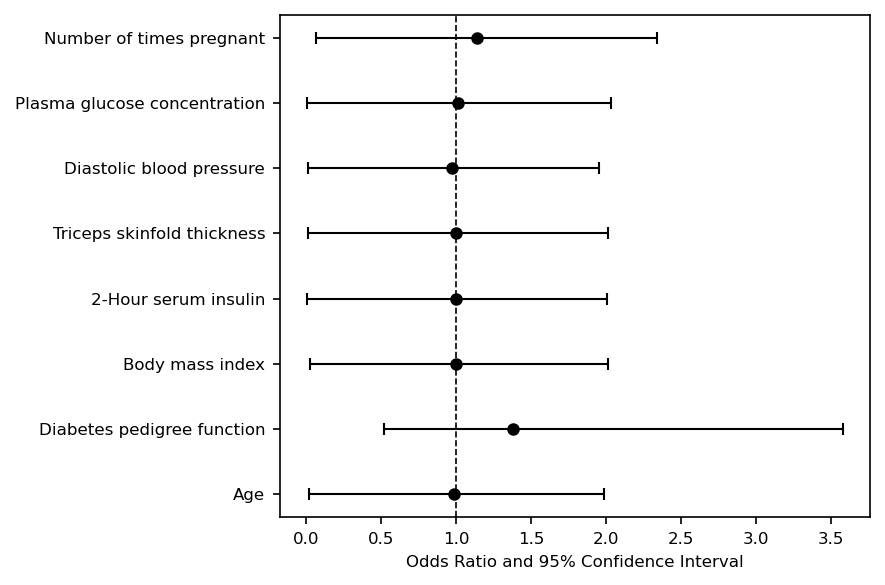

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values]

plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=odds.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")

plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
plt.show()

We can further enhance the figure above by including information on the statistical significance of the variable. Thus, I used color to distinguish statistically significant variables (red-colored lines) from those that are not statistically significant (gray-colored lines). This visualization, as shown in the figure below, allows us now to convey a more compelling story.

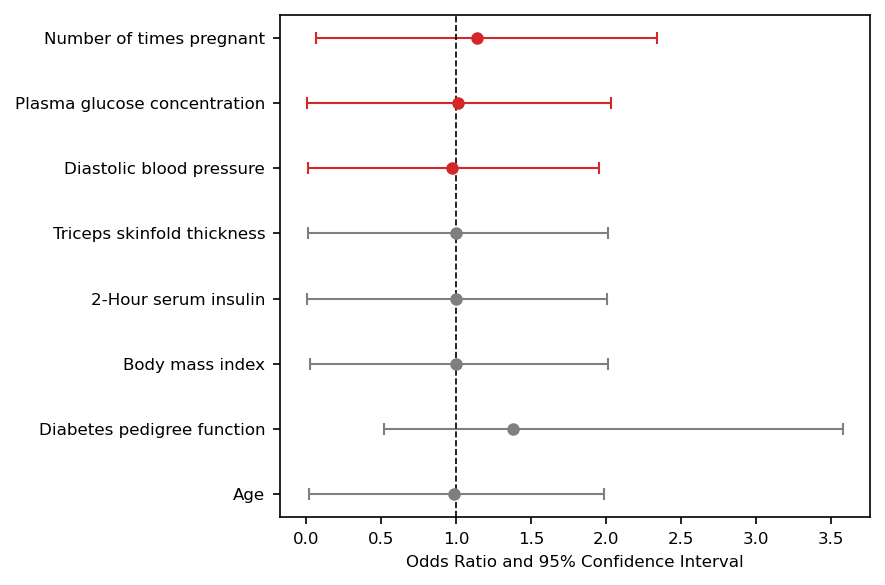

In [6]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)

for idx, row in odds.iloc[::-1].iterrows():
    if row['significant?'] == 'significant':
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=[[row['2.5%']], [row['97.5%']]],
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=[[row['2.5%']], [row['97.5%']]],
            ecolor='tab:gray', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:gray", mec="tab:gray")

plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('forest_plot.png')
plt.show()